# Imports

In [316]:
import warnings
warnings.filterwarnings('ignore')
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Data reading

- reading the CSV

In [317]:
df = pd.read_csv('riyadh_resturants_clean.csv')
print('Shape of DataFrame:', df.shape)
print('Size of DataFrame:', df.size)

Shape of DataFrame: (19361, 11)
Size of DataFrame: 212971


- checking first five rows

In [318]:
df.head()

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
0,مطعم وقت الشواية,Afghan Restaurant,"الرياض 14723, المملكة العربية السعودية",24.518983,46.656981,Moderate,0.0,0,0,NaN,NaN
1,ديوانية عكاظ,Café,"الرياض 14726, المملكة العربية السعودية",24.518511,46.669149,Cheap,0.0,2,0,NaN,NaN
2,شاهي جمر راعي الجمس,Coffee Shop,"الرياض 14726, المملكة العربية السعودية",24.519314,46.670041,Cheap,0.0,0,0,NaN,NaN
3,غدير الشام,Afghan Restaurant,المملكة العربية السعودية,24.519520,46.671660,Moderate,0.0,0,0,NaN,NaN
4,Dunkin',Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0


- checking last five rows

In [319]:
df.tail()


,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
19356,Tav restaurant,Halal Restaurant,المملكة العربية السعودية,24.939902,46.715187,NaN,0.0,0,0,NaN,NaN
19357,First Time,Coffee Shop,"الرياض 13455, المملكة العربية السعودية",24.942522,46.712326,Cheap,1.0,0,0,NaN,NaN
19358,شاورمو,Fast Food Restaurant,"الرياض, المملكة العربية السعودية",24.941936,46.712764,Cheap,0.0,2,0,NaN,NaN
19359,MammaRoti cafe,Café,"King khaled international airport, الرياض, الم...",24.942363,46.712423,Cheap,11.0,14,2,6.1,17.0
19360,Klijaz Foodtruck كليجز فودترك,Food Truck,"الرياض 13316, المملكة العربية السعودية",24.939546,46.764950,Cheap,8.0,21,2,7.8,8.0


## concise summary of our dataset

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19361 entries, 0 to 19360
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           19361 non-null  object 
 1   categories     19361 non-null  object 
 2   address        19361 non-null  object 
 3   lat            19361 non-null  float64
 4   lng            19361 non-null  float64
 5   price          17846 non-null  object 
 6   likes          19359 non-null  float64
 7   photos         19361 non-null  int64  
 8   tips           19361 non-null  int64  
 9   rating         7949 non-null   float64
 10  ratingSignals  7949 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.6+ MB


## Describing the Data

In [321]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,19361.0,24.722588,0.082220,24.469683,24.674721,24.737781,24.784026,24.943424
lng,19361.0,46.697338,0.074112,46.272777,46.643255,46.693637,46.753452,46.940912
likes,19359.0,63.609639,291.028125,0.000000,0.000000,3.000000,17.000000,9984.000000
photos,19361.0,167.775735,985.424550,0.000000,1.000000,4.000000,24.000000,26332.000000
tips,19361.0,17.090853,75.456881,0.000000,0.000000,1.000000,5.000000,2301.000000
rating,7949.0,7.536231,0.942969,4.400000,6.900000,7.600000,8.200000,9.600000
ratingSignals,7949.0,201.637313,552.225144,0.000000,14.000000,38.000000,143.000000,12376.000000


In [322]:
df.describe(exclude='number').T

,count,unique,top,freq
name,19361,14520,Dunkin' Donuts (دانكن دونتس),120
categories,19361,1130,Coffee Shop,2110
address,19361,8996,المملكة العربية السعودية,3845
price,17846,4,Cheap,13499


## Checking for null values

In [323]:
df.isna().sum()

name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                2
photos               0
tips                 0
rating           11412
ratingSignals    11412
dtype: int64

In [324]:
likes_series = pd.isnull(df['likes'])
df.dropna(subset=['likes'],axis=0,inplace=True)
# filtering data
# displaying data only with likes = NaN
df[likes_series]

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals


### Handle null values of price column

- likes and price

In [325]:
df.isna().sum()

name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                0
photos               0
tips                 0
rating           11410
ratingSignals    11410
dtype: int64

- Rating and Rating signals

1- Name

 Check for duplicated names

In [326]:
df[df.name.duplicated()]

,name,categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
38,Starbucks,Coffee Shop,"الرياض, المملكة العربية السعودية",24.535589,46.688637,Cheap,4.0,12,0,8.0,4.0
58,Domino's Pizza,Pizza Place,"Alshifaa Plaza (Imam Muslim), الرياض 14725, ال...",24.535662,46.693060,Cheap,0.0,1,0,7.3,0.0
59,Burger King,American Restaurant,"طريق الامام مسلم, الرياض, المملكة العربية السع...",24.535669,46.692665,Moderate,0.0,1,0,NaN,NaN
146,Shawarmer (شاورمر),Shawarma Place,المملكة العربية السعودية,24.535832,46.910331,NaN,2.0,0,0,7.0,2.0
157,Shawerma Emperor (إمبراطور الشاورما),Shawarma Place,"Almeshtal St., الرياض, المملكة العربية السعودية",24.545473,46.652240,NaN,47.0,21,9,6.8,71.0
...,...,...,...,...,...,...,...,...,...,...,...
19346,Java Cafe,"Café, Coffee Shop","الرياض, المملكة العربية السعودية",24.941622,46.710651,Cheap,3.0,13,2,7.1,5.0
19347,Caribou Coffee (كاريبو كوفي),Coffee Shop,"Terminal 5 (Airport Road), الرياض 13455, الممل...",24.942522,46.712331,Cheap,32.0,61,9,6.9,48.0
19348,Burger King,Fast Food Restaurant,"Gate 508-B, المملكة العربية السعودية",24.942415,46.711974,Cheap,9.0,26,1,6.9,14.0
19349,Domino's Pizza,Pizza Place,"King Khalid International Airport, Terminal 5,...",24.942427,46.711782,Cheap,6.0,30,1,7.1,9.0


In [327]:
print('rating variation = ',df['rating'].var())
print('rating signals variaton = ',df['ratingSignals'].var())

rating variation =  0.8891904227396716
rating signals variaton =  304952.6093826143


In [328]:
def find_rating(row):
    if np.isnan(row['rating']):
        if row['name'] in names_list:
            return ratingMedian[names_list.index(row['name'])]
    else:
        return row['rating']

In [329]:
def find_signals(row):
    if np.isnan(row['ratingSignals']):
        if row['name'] in names_list:
            return signalsMedian[names_list.index(row['name'])]
    else:
        return row['ratingSignals']

In [330]:
namesRating=df[['name','rating','ratingSignals']]
namesRating=namesRating.dropna(axis=1, how="all")
namesRating.dropna(inplace=True)

namesRating['rating_median'] = namesRating.groupby(['name']).rating.transform('median')
namesRating['signals_median'] = namesRating.groupby(['name']).ratingSignals.transform('median')
ratingFinal=namesRating[['name','rating_median','signals_median']]
ratingFinal.drop_duplicates(inplace=True)


names_list=ratingFinal['name'].values.tolist()
ratingMedian=ratingFinal["rating_median"].values.tolist()
signalsMedian=ratingFinal["signals_median"].values.tolist()

df['rating']=df.apply(find_rating, axis=1)
df['ratingSignals']=df.apply(find_signals, axis=1)

In [331]:
print('rating variation = ',df['rating'].var())
print('rating signals variaton = ',df['ratingSignals'].var())

rating variation =  0.8700904540781739
rating signals variaton =  267918.80053790554


In [332]:
df.isna().sum()

name                 0
categories           0
address              0
lat                  0
lng                  0
price             1515
likes                0
photos               0
tips                 0
rating           10027
ratingSignals    10027
dtype: int64

In [333]:
df.sort_values(by='categories',inplace=True)

In [334]:
df['rating'] = df['rating'].fillna(method="bfill")
df['ratingSignals']=df['ratingSignals'].fillna(method="bfill")

In [335]:
print('rating variation = ',df['rating'].var())
print('rating signals variaton = ',df['ratingSignals'].var())

rating variation =  0.8633516226090907
rating signals variaton =  217241.54855693947


In [336]:
df.isna().sum()

name                0
categories          0
address             0
lat                 0
lng                 0
price            1515
likes               0
photos              0
tips                0
rating              1
ratingSignals       1
dtype: int64

In [337]:
df.dropna(subset=['rating','ratingSignals'],axis=0,inplace=True)

In [338]:
df.isna().sum()

name                0
categories          0
address             0
lat                 0
lng                 0
price            1514
likes               0
photos              0
tips                0
rating              0
ratingSignals       0
dtype: int64

## Some efforts to fill the nulls of rating column

In [339]:
#df.groupby(['tips'])['rating'].mean()

In [340]:
#def in_range(row):
#    if np.isnan(row['rating']):
#        listtip=intervile.contains(row['tips']).tolist()
#       for x in attay:
#           if x==True:
#                return rating_list[attay.index(x)]
#    else:
#        return row['rating']

In [341]:
#result = df.groupby(pd.cut(df['tips'], 
#                  bins=np.arange(0,2302,50)))['rating'].mean().reset_index()

#intervile=pd.arrays.IntervalArray(result['tips'].values.tolist())
#rating_list = result['rating'].values.tolist()
#df['rating'] = df.apply(in_range,axis=1)
# [0,200,400,600,800,1000,1200,np.inf]

In [342]:
#def in_range1(row):
#    if np.isnan(row['ratingSignals']):
#        listtip=intervile.contains(row['rating']).tolist()
#        for x in attay:
#            if x==True:
#                return rating_list[attay.index(x)]
#    else:
 #       return row['ratingSignals']

In [343]:
#result = df.groupby(pd.cut(df['rating'], 
#                  bins=np.arange(0,9984,50)))['ratingSignals'].mean().reset_index()

#intervile=pd.arrays.IntervalArray(result['rating'].values.tolist())
#rating_list = result['ratingSignals'].values.tolist()
#df['ratingSignals'] = df.apply(in_range,axis=1)
# [0,200,400,600,800,1000,1200,np.inf]

In [344]:
# price_null = df[df['price'].isnull()]
# df.dropna(subset=['price'],axis=0,inplace=True)

## Check for columns

In [345]:
for i in df.columns:
    print(i," : " ,df[i].unique())

name  :  ['مطعم وقت الشواية' 'فوال الطائف' 'بخاري بركة الشباب' ...
 'Foul & Mutabbaq (فول و مطبق)' 'روابي غوار'
 'Al Romansiah Restaurants (مطاعم الرومانسية)']
categories  :  ['Afghan Restaurant' 'Afghan Restaurant, Middle Eastern Restaurant'
 'African Restaurant' ... 'Yemeni Restaurant'
 'Yemeni Restaurant, Breakfast Spot'
 'Yemeni Restaurant, Middle Eastern Restaurant']
address  :  ['الرياض 14723, المملكة العربية السعودية' 'المملكة العربية السعودية'
 'الرياض 13226, المملكة العربية السعودية' ...
 'ظهرة لبن - شارع نجران (شارع نجران), الرياض 13781, المملكة العربية السعودية'
 'الرياض 12662, المملكة العربية السعودية'
 'العزيزية (طريق العزيزية), الرياض 14514, المملكة العربية السعودية']
lat  :  [24.518983   24.661106   24.6584594  ... 24.798539   24.580896
 24.57062821]
lng  :  [46.656981   46.724732   46.7444229  ... 46.62083    46.78138
 46.66728801]
price  :  ['Moderate' 'Very Expensive' 'Expensive' nan 'Cheap']
likes  :  [0.000e+00 3.000e+00 2.000e+00 1.000e+00 4.000e+00 1.500e+01 1.000

## Checking if there are duplicates

In [346]:
df.duplicated().sum()

1

In [347]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(19358, 11)
(19357, 11)


In [348]:
df.isna().sum()

name                0
categories          0
address             0
lat                 0
lng                 0
price            1514
likes               0
photos              0
tips                0
rating              0
ratingSignals       0
dtype: int64

## Data ploting

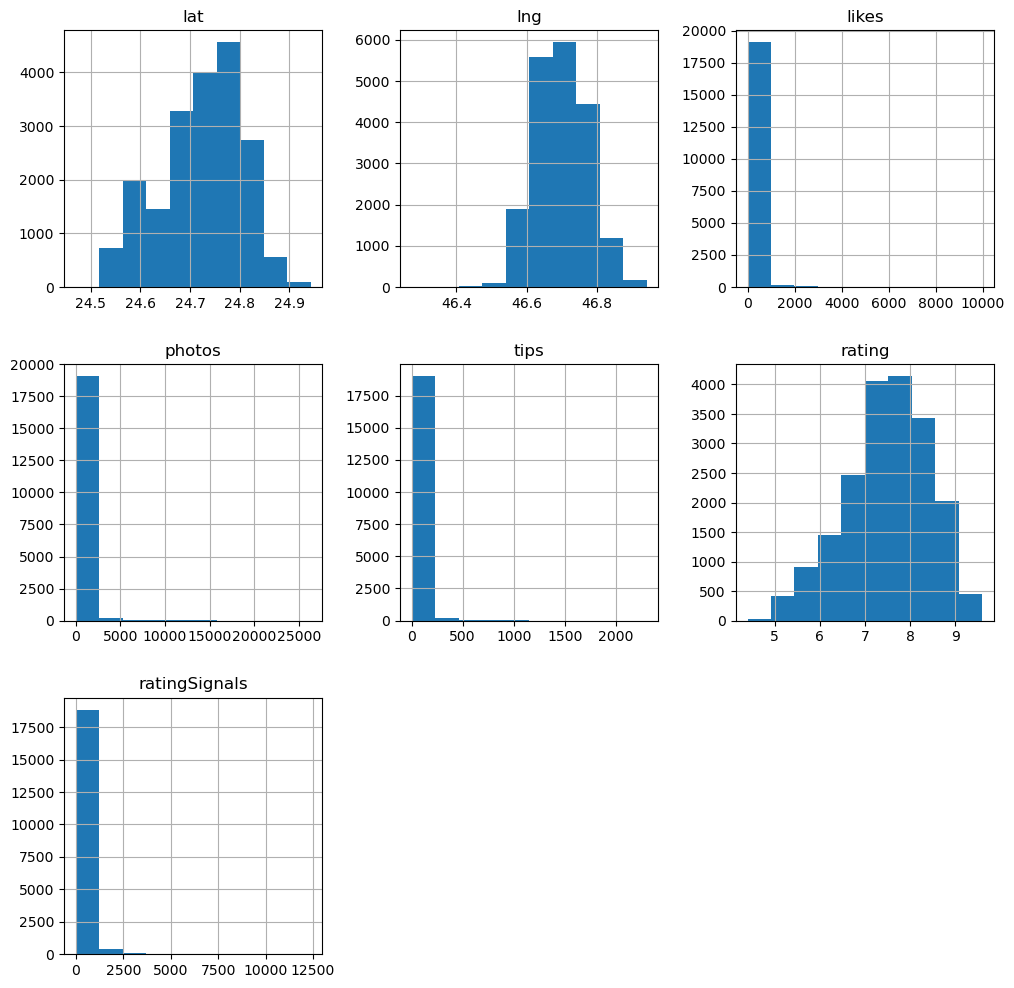

In [349]:
df.hist(figsize = (12, 12))
plt.show()

- Heatmap

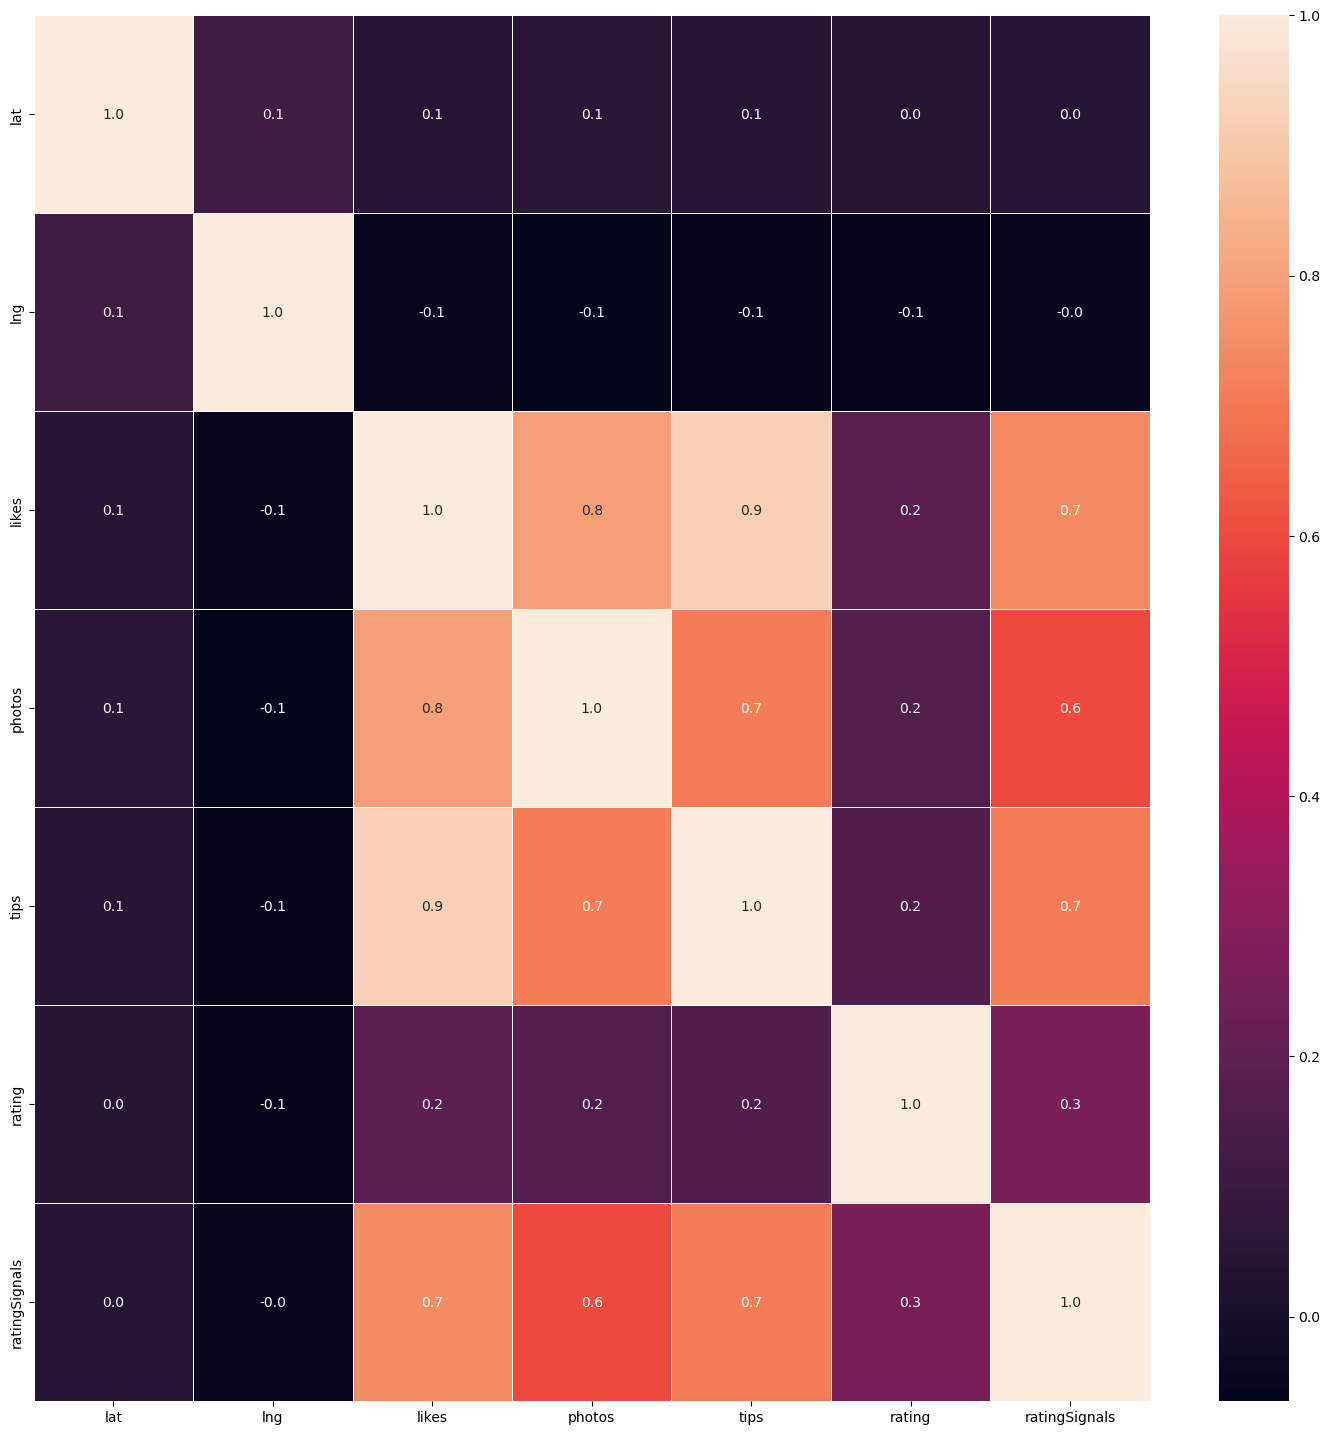

In [350]:
ig,ax = plt.subplots(figsize=(18, 18))
axes = sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

- Map

In [351]:
fig = px.scatter_mapbox(df,
                        lat=df['lat'], 
                        lon=df['lng'],  
                        color=df['price'],
                        hover_name=df['name'],
                        mapbox_style="open-street-map",
                        title='Riyadh Restaurants',
                       )
fig.show()

In [352]:
df_sorted = df.sort_values(by='rating',ascending=False).head(10)
px.bar(data_frame=df_sorted,x='name',y='rating',color='price',title='top 10 restaurants ratings')


# Machine learning modeling

## Features Selection

In [353]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

We would choose price column as our target and for the features we would discard the two columns name and address as they don't contribute to our model

In [354]:
X = df[['categories','lat','lng','likes','photos', 'tips', 'rating', 'ratingSignals','price']]

In [355]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X[['lat','lng','likes','photos', 'tips', 'rating', 'ratingSignals']]))
X.columns = ['lat','lng','likes','photos', 'tips', 'rating', 'ratingSignals']
X['categories']=df['categories']
X = pd.concat([X, X['categories'].str.get_dummies(sep=',')], axis=1)
X['price']=df['price']
price_null = X[X['price'].isnull()]
X.dropna(subset=['price'],axis=0,inplace=True)
y=X['price']
X.drop(columns=['price'],inplace=True)

In [356]:
for i in X.columns:
    print(i," : " ,X[i].unique())

lat  :  [-2.47640532 -0.74761046 -0.7798039  ... -1.11834714  0.92413489
 -1.72329093]
lng  :  [-0.54463616  0.36974826  0.63550157 ...  0.51881434 -1.03253909
  1.13428382]
likes  :  [-2.18583582e-01 -2.08275546e-01 -2.11711558e-01 -2.15147570e-01
 -2.04839534e-01 -1.67043402e-01 -1.84223462e-01 -1.87659474e-01
 -1.80787450e-01 -1.97967510e-01 -1.77351438e-01 -1.60171378e-01
 -4.33469684e-02  1.50652362e-02 -1.24228601e-02 -1.94531498e-01
 -2.01403522e-01 -2.96029203e-02 -8.11431008e-02  1.97173874e-01
 -3.30389323e-02 -1.91095486e-01 -1.12067209e-01 -5.55083600e-03
 -5.02189925e-02 -1.73915426e-01  1.45131827e+00 -1.46427330e-01
  1.97359210e+00  1.78804745e+00 -7.42710767e-02 -1.22375245e-01
  7.98475981e-01  1.27608165e+00  2.12821264e+00  2.02169627e+00
  6.14147470e+00  1.14894921e+00  1.06976267e+01  3.22452964e-02
  2.53732723e-02  1.37916202e+00 -6.39630406e-02  8.00722923e+00
  5.16722994e-01  3.01126773e+00 -3.64749443e-02 -1.63607390e-01
  6.88523596e-01  2.78792695e+00  1.

In [359]:
X.drop(labels='categories',
    axis= 1, inplace=True)

In [360]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (14271, 396)
The shape of X_test is        (3568, 396)
The shape of y_train is       (14271,)
The shape of y_test is        (3568,)


### Decision Tree Classifier model

In [361]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [362]:
y_pred = dt.predict(X_test)

In [363]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

         Cheap       0.99      0.99      0.99      2688
     Expensive       0.79      0.78      0.79        68
      Moderate       0.95      0.95      0.95       795
Very Expensive       0.80      0.71      0.75        17

      accuracy                           0.98      3568
     macro avg       0.88      0.86      0.87      3568
  weighted avg       0.98      0.98      0.98      3568



In [364]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

         Cheap       0.99      0.99      0.99      2688
     Expensive       0.79      0.78      0.79        68
      Moderate       0.95      0.95      0.95       795
Very Expensive       0.80      0.71      0.75        17

      accuracy                           0.98      3568
     macro avg       0.88      0.86      0.87      3568
  weighted avg       0.98      0.98      0.98      3568



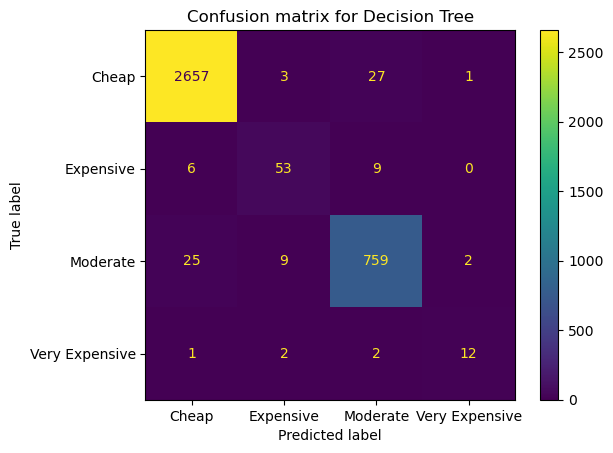

In [365]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.title('Confusion matrix for Decision Tree')
plt.show()

### Check for overfitting

In [379]:
# evaluate on the train dataset
train_yhat = dt.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = dt.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 1.0
testing accuracy 0.9756165919282511


### Random Forrest model

In [366]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [367]:
y_pred = rf.predict(X_test)

In [368]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

         Cheap       0.99      1.00      0.99      2688
     Expensive       0.96      0.81      0.88        68
      Moderate       0.99      0.96      0.98       795
Very Expensive       1.00      0.76      0.87        17

      accuracy                           0.99      3568
     macro avg       0.99      0.88      0.93      3568
  weighted avg       0.99      0.99      0.99      3568



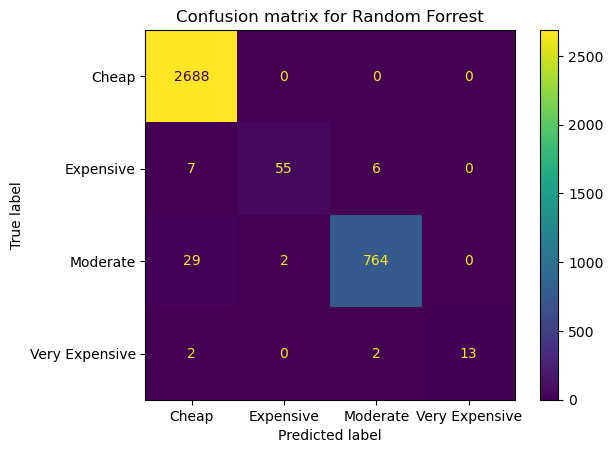

In [369]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title('Confusion matrix for Random Forrest')
plt.show()

### Check for overfitting

In [378]:
# evaluate on the train dataset
train_yhat = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 0.9998598556513209
testing accuracy 0.9865470852017937


## KNN

In [373]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [374]:
y_pred = knn.predict(X_test)

In [375]:
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

         Cheap       0.96      1.00      0.98      2688
     Expensive       0.97      0.57      0.72        68
      Moderate       0.97      0.88      0.92       795
Very Expensive       1.00      0.47      0.64        17

      accuracy                           0.96      3568
     macro avg       0.98      0.73      0.82      3568
  weighted avg       0.96      0.96      0.96      3568



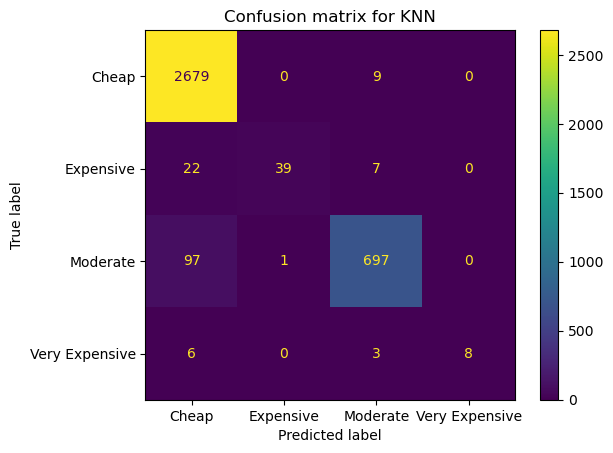

In [376]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title('Confusion matrix for KNN')
plt.show()

### Check for overfitting

In [377]:
# evaluate on the train dataset
train_yhat = knn.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print(train_acc)
 # evaluate on the test dataset
test_yhat = knn.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print(test_acc)

0.9710601919977577
0.9593609865470852


### Model Evaluation

In [311]:
from sklearn import metrics
models = []
models.append(KNeighborsClassifier())
models.append(tree.DecisionTreeClassifier())
models.append(RandomForestClassifier())

model_list = ['KNN', 'Decision Tree', 'Random Forest']
acc_list = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

In [312]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list})
result_df

,Model,Accuracy
0,KNN,0.959361
1,Decision Tree,0.976177
2,Random Forest,0.986267


In [313]:
px.bar(data_frame=result_df,x='Model',y='Accuracy',title='Accuracy in % of each model')

# Conclusions
All of the three models showed a very high accuracy but Random Forest were the highest accuracy score and the least differnce between train accuracy and test accuracy

# Extra work

In [314]:
price_null.drop(columns=['categories','price'],inplace=True)
y_pred = knn.predict(price_null)
y_pred

array(['Cheap', 'Cheap', 'Cheap', ..., 'Cheap', 'Cheap', 'Cheap'],
      dtype=object)

In [315]:
price_null['price'] = y_pred
price_null['price'].value_counts()

Cheap        1407
Moderate      108
Expensive       3
Name: price, dtype: int64